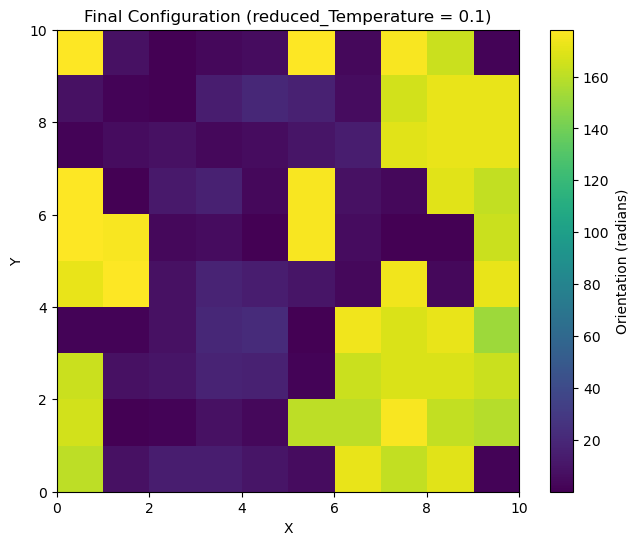

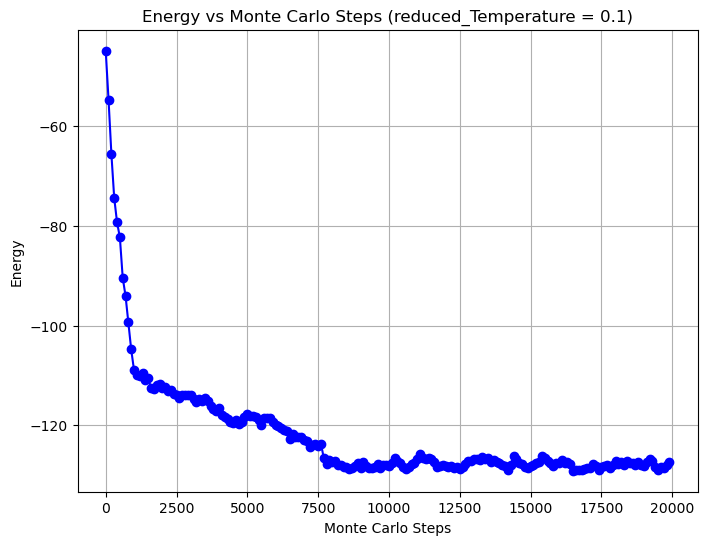

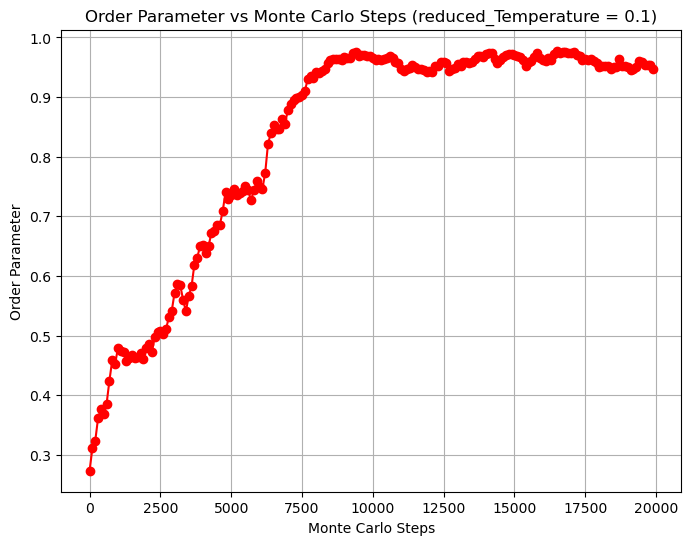

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import circmean

# Constants
N = 10  # Size of the grid (N x N)
epsilon = 1.0  # Interaction strength
reduced_Temp = 0.1   # Temperature parameter
k_B = 1.38e-23
Temperature = reduced_Temp * epsilon / k_B
steps = 20000  # Number of Monte Carlo steps

# Possible director angles in radians (0°, 45°, 90°, 135°, 180°, 225°, 270°, 315°)
angles = np.deg2rad(np.arange(0,180,10))

# Initialize directors with random orientations
directors = np.random.choice(angles, size=(N, N))

# Define shifts for periodic boundary conditions
shifts = [(-1, 0), (1, 0), (0, -1), (0, 1)]


def calculate_energy_contributions(directors):
    cos_theta = np.cos(directors)
    sin_theta = np.sin(directors)
    energy = np.zeros_like(directors)

    for dx, dy in shifts:
        cos_shifted = np.roll(cos_theta, shift=(dx, dy), axis=(0, 1))
        sin_shifted = np.roll(sin_theta, shift=(dx, dy), axis=(0, 1))
        cos_diff = cos_theta * cos_shifted + sin_theta * sin_shifted
        energy += -epsilon * (cos_diff**2 - 1/3)
    
    return energy

# Function to calculate total energy of the system
def calculate_total_energy(energy_contributions):
    return np.sum(energy_contributions) / 2  # Each interaction is counted twice, so divide by 2

# Function to perform Monte Carlo step
def monte_carlo_step(directors, reduced_Temp):
    i, j = np.random.randint(N), np.random.randint(N)  # Randomly select a site
    
    # Calculate current energy contributions
    energy_contributions = calculate_energy_contributions(directors)
    current_energy = calculate_total_energy(energy_contributions)
    
    # Flip orientation (rotate by ±45 degrees)
    current_angle = directors[i, j]
    new_angle = current_angle + np.pi / 10 * np.random.choice([-1, 1])
    new_angle = (new_angle + np.pi) % (np.pi)  # Ensure angle is within [0, π)
    
    new_directors = directors.copy()
    new_directors[i, j] = new_angle
    
    # Calculate new energy contributions
    new_energy_contributions = calculate_energy_contributions(new_directors)
    new_energy = calculate_total_energy(new_energy_contributions)
    
    # Metropolis criterion
    delta_E = (new_energy - current_energy) / epsilon
    if delta_E <= 0 or np.random.rand() < np.exp(-delta_E / reduced_Temp):
        directors[i, j] = new_angle  # Accept the change
    
    return directors

# Function to run Monte Carlo simulation
def run_simulation(steps, reduced_Temp):
    directors = np.random.choice(angles, size=(N, N))  # Initialize with random orientations
    energies = []
    order_parameters = []

    for step in range(steps):
        directors = monte_carlo_step(directors, reduced_Temp)
        if (step + 1) % 100 == 0:
            energy_contributions = calculate_energy_contributions(directors)
            energies.append(calculate_total_energy(energy_contributions))
            average_angle = calculate_average_angle(directors)
            aligned_directors = ((directors - average_angle) + np.pi) % np.pi  # Align directors relative to average angle
            order_parameters.append(calculate_order_parameter(aligned_directors))
    
    return np.rad2deg(aligned_directors), energies, order_parameters

# Order parameter
def calculate_order_parameter(directors):
    cos_theta = np.cos(directors)
    order_parameter = np.mean((3 * cos_theta**2 - 1) / 2)
    return order_parameter

def calculate_average_angle(directors):
    return circmean(directors.flatten(), high=np.pi)

# Run simulation
directors_final, energies, order_parameters  = run_simulation(steps, reduced_Temp)

# Plotting the final configuration
plt.figure(figsize=(8, 6))
plt.imshow(directors_final, origin='lower', extent=(0, N, 0, N))
plt.title(f'Final Configuration (reduced_Temperature = {reduced_Temp})')
plt.colorbar(label='Orientation (radians)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Plotting the energy evolution
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(energies)) * 100, energies, marker='o', linestyle='-', color='b')
plt.title(f'Energy vs Monte Carlo Steps (reduced_Temperature = {reduced_Temp})')
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Energy')
plt.grid(True)
plt.show()


# Plotting the order parameter evolution
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(order_parameters)) * 100, order_parameters, marker='o', linestyle='-', color='r')
plt.title(f'Order Parameter vs Monte Carlo Steps (reduced_Temperature = {reduced_Temp})')
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Order Parameter')
plt.grid(True)
plt.show()


In [113]:
directors_final



array([[1.60031198e+02, 8.03119800e+00, 1.40311980e+01, 1.40311980e+01,
        1.00311980e+01, 6.03119800e+00, 1.72031198e+02, 1.62031198e+02,
        1.70031198e+02, 2.03119800e+00],
       [1.66031198e+02, 3.11980017e-02, 2.03119800e+00, 8.03119800e+00,
        4.03119800e+00, 1.60031198e+02, 1.60031198e+02, 1.76031198e+02,
        1.62031198e+02, 1.58031198e+02],
       [1.64031198e+02, 8.03119800e+00, 1.00311980e+01, 1.80311980e+01,
        1.60311980e+01, 2.03119800e+00, 1.64031198e+02, 1.68031198e+02,
        1.68031198e+02, 1.64031198e+02],
       [2.03119800e+00, 2.03119800e+00, 8.03119800e+00, 2.00311980e+01,
        2.20311980e+01, 3.11980017e-02, 1.74031198e+02, 1.68031198e+02,
        1.72031198e+02, 1.52031198e+02],
       [1.72031198e+02, 1.78031198e+02, 8.03119800e+00, 1.80311980e+01,
        1.40311980e+01, 1.00311980e+01, 4.03119800e+00, 1.74031198e+02,
        4.03119800e+00, 1.72031198e+02],
       [1.78031198e+02, 1.76031198e+02, 4.03119800e+00, 6.03119800e+00,
   

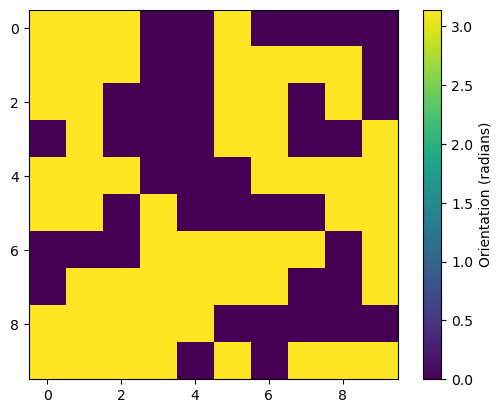

In [80]:
plt.imshow(directors_final)
plt.colorbar(label='Orientation (radians)')


In [60]:
x = 5.66667

np.round(x,2)

5.67

In [100]:
average_angle = calculate_average_angle(directors_final)
s = (directors_final - average_angle + np.pi) % np.pi 
s

array([[2.74889357, 0.39269908, 0.39269908, 0.39269908, 0.39269908,
        0.39269908, 2.74889357, 2.74889357, 2.74889357, 2.74889357],
       [2.74889357, 0.39269908, 0.39269908, 0.39269908, 0.39269908,
        0.39269908, 2.74889357, 2.74889357, 2.74889357, 2.74889357],
       [2.74889357, 0.39269908, 0.39269908, 0.39269908, 0.39269908,
        0.39269908, 2.74889357, 2.74889357, 2.74889357, 2.74889357],
       [2.74889357, 0.39269908, 0.39269908, 0.39269908, 0.39269908,
        0.39269908, 2.74889357, 2.74889357, 2.74889357, 2.74889357],
       [2.74889357, 0.39269908, 0.39269908, 0.39269908, 0.39269908,
        0.39269908, 2.74889357, 2.74889357, 2.74889357, 2.74889357],
       [2.74889357, 0.39269908, 0.39269908, 0.39269908, 0.39269908,
        0.39269908, 2.74889357, 2.74889357, 2.74889357, 2.74889357],
       [2.74889357, 0.39269908, 0.39269908, 0.39269908, 0.39269908,
        0.39269908, 2.74889357, 2.74889357, 2.74889357, 2.74889357],
       [2.74889357, 0.39269908, 0.3926990

In [85]:
np.rad2deg((3.14159265e+00 + np.pi) % np.pi)

179.99999979432

In [47]:
cos_theta = np.cos(directors_final)
P2 = (3 * cos_theta**2 - 1) / 2
S = np.mean(P2)
S

-0.5

In [67]:
directors = np.full((N, N), 10.0)
cos_theta = np.cos(directors)
P2 = (3 * cos_theta**2 - 1) / 2
S = np.mean(P2)
S

0.5560615463600439

In [68]:
cos_theta = np.cos(directors)
cos2_theta = cos_theta**2
order_parameter = np.mean(cos2_theta) - 1/3
order_parameter

0.3707076975733626

In [56]:
directors

array([[1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633,
        1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633],
       [1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633,
        1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633],
       [1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633,
        1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633],
       [1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633,
        1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633],
       [1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633,
        1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633],
       [1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633,
        1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633],
       [1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633,
        1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633],
       [1.57079633, 1.57079633, 1.5707963